In [84]:
%run imports.py

Imports successfully loaded


In [2]:
A = np.load('A.npy')
b = np.load('b.npy')

In [3]:
num_test = 15
num_train = len(b) - num_test

In [29]:
A_train, A_test = A[:num_train], A[num_train:]
b_train, b_test = b[:num_train], b[num_train:]

In [30]:
A_train.shape, b_train.shape

((126, 45), (126,))

In [40]:
def train_model(model_class, A_train, b_train, A_test):
    model = model_class()
    model.fit(A_train, b_train)
    return model.predict(A_test)

In [15]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [48]:
models = ['LinearRegression', 
          'ElasticNet', 
          'DecisionTreeRegressor', 
          'RandomForestRegressor',
          'GradientBoostingRegressor']
model_classes = [eval(m) for m in models]

In [42]:
train_model(LinearRegression, A_train, b_train, A_test)

array([ 0.30860644, -0.31981998, -0.01604092,  0.09770009, -0.12827098,
        0.01945644,  0.00810892, -0.4864505 , -0.06710495, -0.04597695,
       -0.02209614,  0.01805951, -6.49634091,  0.05768277, -0.01681326])

In [49]:
predictions = []

for m in model_classes:
    predictions.append(train_model(m, A_train, b_train, A_test))

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15051802626086763, tolerance: 0.0002032525613936178



In [50]:
errors = []
for p in predictions:
    errors.append(b_test - p)
    
error_mags = [np.linalg.norm(e) for e in errors]

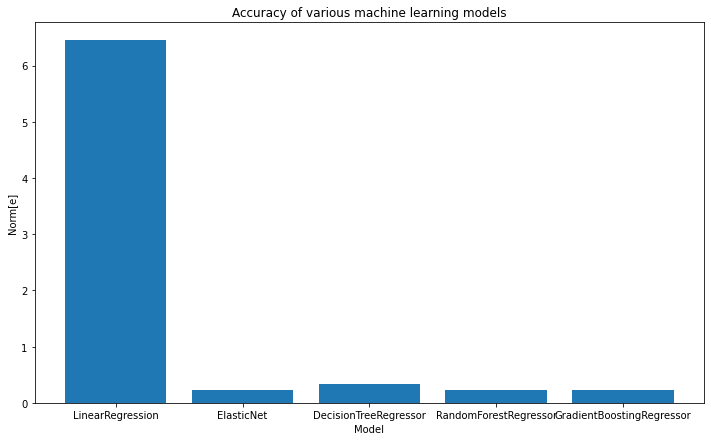

In [55]:
x_pos = [i for i, _ in enumerate(models)]

plt.figure(figsize=(12,7))
plt.bar(x_pos, error_mags)
plt.xlabel("Model")
plt.ylabel("Norm[e]")
plt.title("Accuracy of various machine learning models")

plt.xticks(x_pos, models)
plt.show()

In [56]:
errors[0]

array([-0.24147543,  0.27526504, -0.02719624, -0.11202633,  0.08500412,
       -0.09870254,  0.03961325,  0.47393721,  0.09525021,  0.08279829,
       -0.00854629, -0.07092958,  6.41484545, -0.07605605, -0.01928116])

In [60]:
errors[np.argmin(error_mags)]

array([ 0.10743552,  0.00688361, -0.01176742,  0.06690355,  0.00213174,
        0.08185125,  0.07746088,  0.06464288,  0.03653611,  0.07123163,
        0.04168778, -0.00503641, -0.07382714,  0.03388285, -0.0475635 ])

In [81]:
from sklearn.model_selection import cross_val_score

def cv_model(model_class, A_train, b_train):
    model = model_class()
    scores = cross_val_score(model, A_train, b_train, scoring="neg_mean_squared_error", cv=10)
    return scores

In [82]:
cv_scores = [cv_model(m, A_train, b_train) for m in model_classes]

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.057522160407259326, tolerance: 0.00016677164530139166

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3111694001317977, tolerance: 0.00020042044486602096

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010154234347097946, tolerance: 0.00015125032485299324

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converg

In [85]:
pprint(cv_scores)

[array([-2.29124278e-01, -8.51802055e-02, -6.12028482e-01, -4.38797141e+00,
       -1.06978542e-02, -5.56972888e-02, -8.93289617e+01, -2.01623229e+02,
       -2.19818550e+04, -7.35198569e+01]),
 array([-0.02849838, -0.01679032, -0.04081036, -0.01656484, -0.00103807,
       -0.0217839 , -0.03876498, -0.02379816, -0.00135817, -0.05674981]),
 array([-0.04595782, -0.0463243 , -0.01084404, -0.00130096, -0.00818151,
       -0.02530844, -0.04110782, -0.01227159, -0.018435  , -0.01727002]),
 array([-0.03130842, -0.04074992, -0.02527744, -0.00165888, -0.00062793,
       -0.01346282, -0.01133002, -0.00802858, -0.00114401, -0.01369727]),
 array([-0.03650811, -0.04511214, -0.02628036, -0.00211183, -0.00066754,
       -0.0192967 , -0.01324533, -0.00432278, -0.00206181, -0.01250517])]


In [86]:
[np.linalg.norm(cv) for cv in cv_scores]

[21983.084515059265,
 0.09381380344532965,
 0.08696752457839067,
 0.062015052364730205,
 0.06921436642148075]

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 100, 1000], 
              'max_depth': [2, 8, 100, None], 
              'warm_start': [False, True]}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(A_train, b_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [89]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 10, 'warm_start': False}

In [91]:
optimized_forest = RandomForestRegressor(max_depth=8, n_estimators=10, warm_start=False)

In [92]:
optimized_forest.fit(A_train, b_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
prediction = optimized_forest.predict(A_test)

In [96]:
for i in range(len(prediction)):
    print(prediction[i], '\t', b_test[i])

-0.033413364597006626 	 0.06713100550825112
-0.05183593046564722 	 -0.044554937833480544
-0.08429187538609459 	 -0.043237167516557116
-0.03282923660783461 	 -0.014326237891662895
-0.17298101616548128 	 -0.0432668590247657
-0.2149724109906364 	 -0.0792461021764647
-0.05191052284759958 	 0.04772217124716452
-0.03813250434145625 	 -0.01251329673282663
-0.008536026917955287 	 0.02814525524853178
-0.014931875274887147 	 0.03682133373718627
-0.11879200515430315 	 -0.030642429494516538
-0.06251671262592784 	 -0.05287007630079422
-0.006192972484670285 	 -0.08149546474387778
-0.031706617538706953 	 -0.01837328164108803
0.029886892786656162 	 -0.03609441522734562
